#### Завдання
### Напишіть код для визначення границь та кутів у зображенні за допомогою фільтра **Собеля**.
### Використовуючи метод густини **градієнта HOG**, напишіть код для витягування ознак із зображення.
### Завантажте датасет **CIFAR-10** та використайте **HOG** для витягування ознак зображень. Застосуйте будь-який класифікатор (наприклад **SVM**) для класифікації зображень та обчисліть такі метрики точності:
 * accuracy;
 * precision;
 * recall;
 * F1-score.
### Використайте **метод SIFT**  для витягування ознак із зображень та порівняйте його з **методом HOG**.

In [1]:
# Required libraries.
import cv2
import numpy as np
import random
from keras.datasets import cifar10
from skimage import data
from skimage.feature import hog
from sklearn import svm
from skimage import exposure
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# **<font color='blue'>Implementing The Sobel Edge Detection</font>**

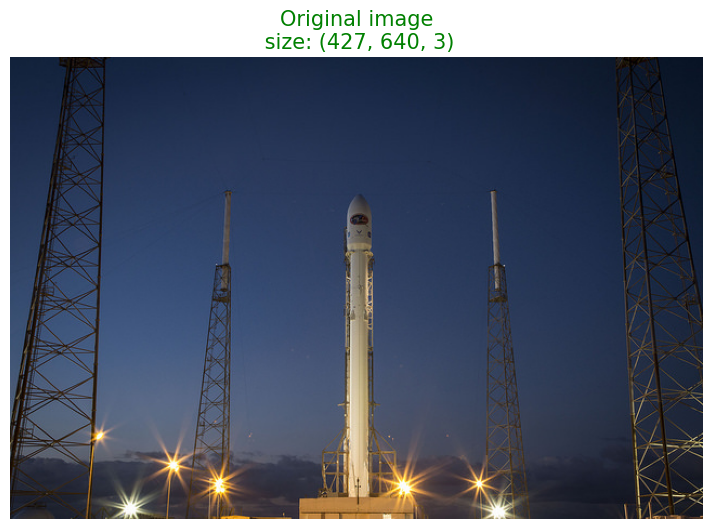

In [2]:
# Download an image.
origin_image = data.rocket()

# Visualisation.
plt.figure(figsize=(10, 6))
plt.title(f'Original image\n size: {origin_image.shape}', fontsize=15, color='g')
plt.axis('off')
plt.imshow(origin_image)
plt.show()

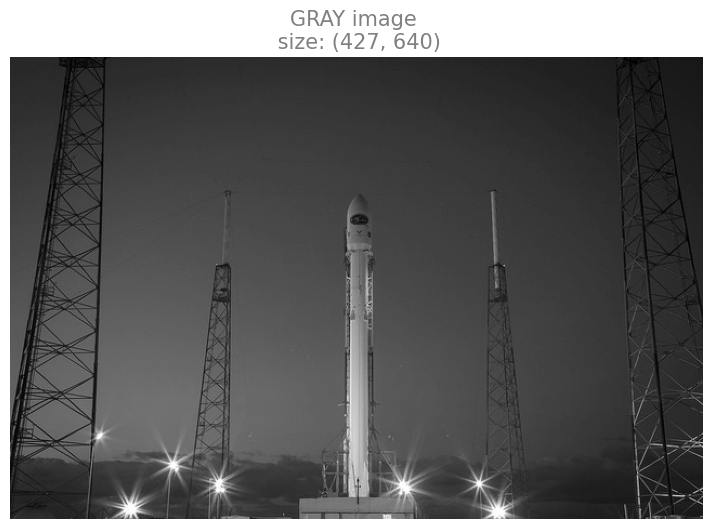

In [3]:
# Converting the origin image to GRAY.
gray_img = cv2.cvtColor(origin_image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10, 6))
plt.title(f'GRAY image \n size: {gray_img.shape}', fontsize=15, color='gray')
plt.axis('off')
plt.imshow(gray_img, cmap='gray')
plt.show()

# **<font color='blue'>SOBEL filter**</font>

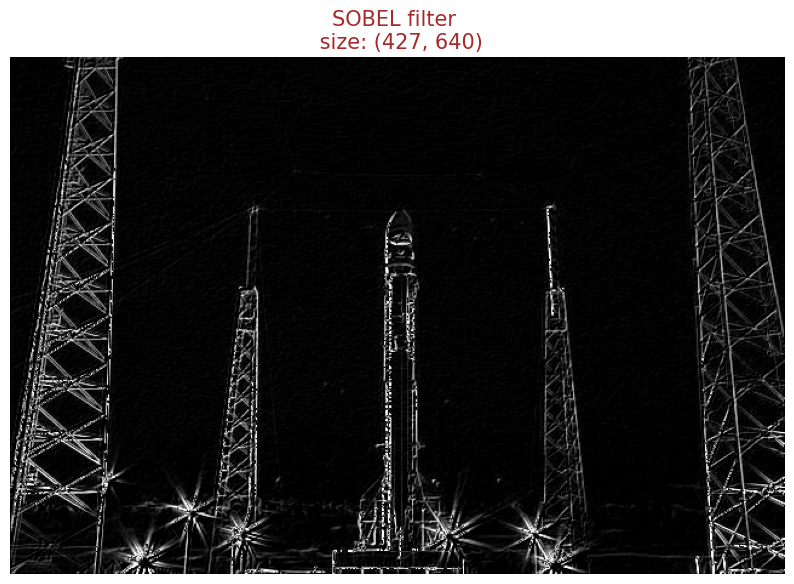

In [5]:
# Making matrix for the Sobel filter.
kernel_X = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
kernel_y = np.array([[-1,-2,-1], [0,0,0], [1,2,1]])

'''Note:
kernel – the 2d matrix we want the image to convolve with.
This function will simply convolute the 2d matrix with the image
at pixel level and produce an output image. '''

# Splitting into X, y edges for applying the Sobel filter
edges_X = cv2.filter2D(gray_img, -1, kernel_X)
edges_y = cv2.filter2D(gray_img, -1, kernel_y)

# Combining edges.
Sobel_edges = edges_X + edges_y

# Creating a figure for a subplot.
fig = plt.figure(figsize=(10, 8))
plt.title(f'SOBEL filter \n size: {gray_img.shape}', fontsize=15, color='brown')
plt.axis('off')

# Display the Sobel filter.
plt.imshow(Sobel_edges, cmap='gray')
plt.show()

# **<font color='blue'>Histogram of Oriented Gradients (HOG)**</font>

In [6]:
# Calculate the HOG descriptor.
fd1, hog_image1 = hog(origin_image, orientations=8,
                    pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1),
                    visualize=True, channel_axis=-1)

# Rescale histogram for better visualisation.
hog_image_rescaled1 = exposure.rescale_intensity(hog_image1, in_range=(0, 10))

# Saving the HOG image.
cv2.imwrite('HOG_image.jpg', hog_image_rescaled1)
print('HOG image has been successfully saved!')

HOG image has been successfully saved!


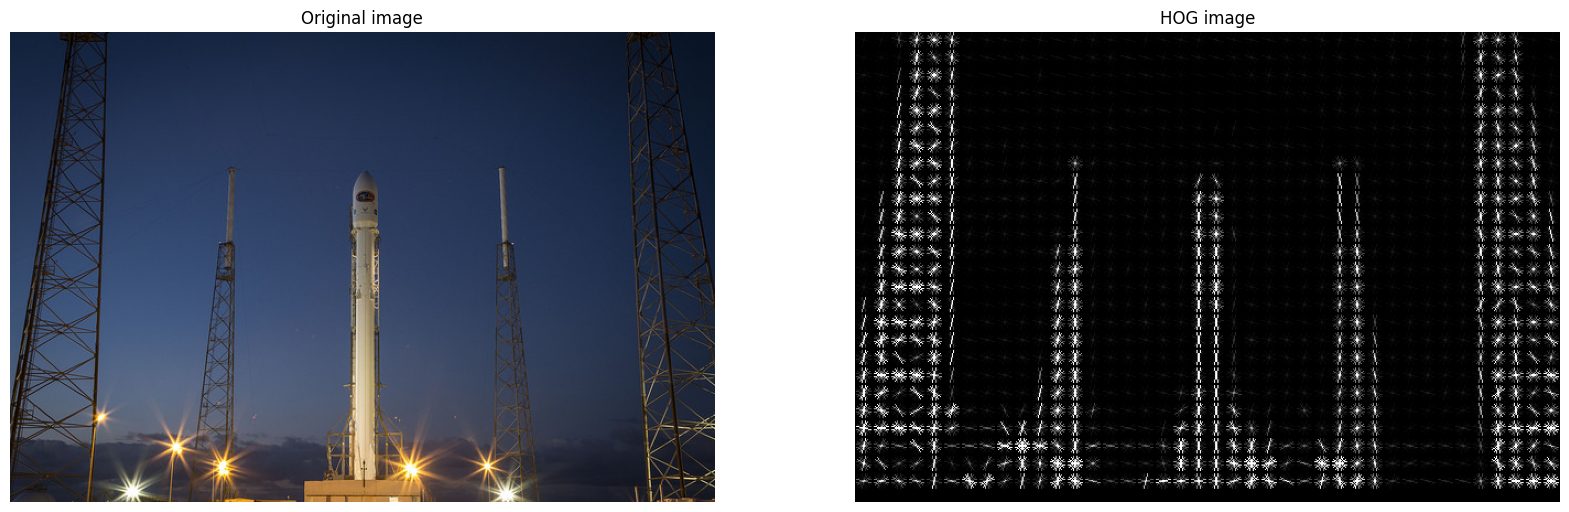

In [7]:
# Displaying the Original image and the HOG (descriptor) image.

# Creating a figure for a subplot.
fig = plt.figure(figsize=(20, 16))

# Subplot and title of the Original image.
ax1 = fig.add_subplot(221)  # top left side.
ax1.title.set_text('Original image')

# Subplot and title of the HOG image.
ax2 = fig.add_subplot(222)  # top right side.
ax2.title.set_text('HOG image')

# Display the subplot.
ax1.imshow(origin_image)
ax2.imshow(hog_image_rescaled1, cmap='gray')
ax1.axis('off')
ax2.axis('off')
plt.show()

# **<font color='blue'>CIFAR-10 dataset**</font>

## **<font color='red'>Downloading the dataset**</font>

In [8]:
# Downloading a dataset CIFAR-10.
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train data:', X_train.shape)
print('X_test data:', X_test.shape)
print('y_train data:', y_train.shape)
print('y_test data:', y_test.shape)

X_train data: (50000, 32, 32, 3)
X_test data: (10000, 32, 32, 3)
y_train data: (50000, 1)
y_test data: (10000, 1)


## **<font color='red'>Random image selection and saving into a file**</font>

In [12]:
# Random image selection from the dataset.
for i in range(random.randint(0, 100)):
  img = X_train[i]
  label = y_train[i][0]
  classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# Calculate the HOG descriptor.
fd2, hog_image2 = hog(img,
                    orientations=8,
                    pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1),
                    visualize=True,
                    channel_axis=-1)

# Rescale histogram for better visualisation.
hog_image_rescaled2 = exposure.rescale_intensity(hog_image2, in_range=(0, 10))

# Saving the HOG image.
cv2.imwrite('HOG_cifar10.jpg', hog_image_rescaled2)
print('HOG image has been successfully saved!')

HOG image has been successfully saved!


## **<font color='red'>Displaying selected image**</font>

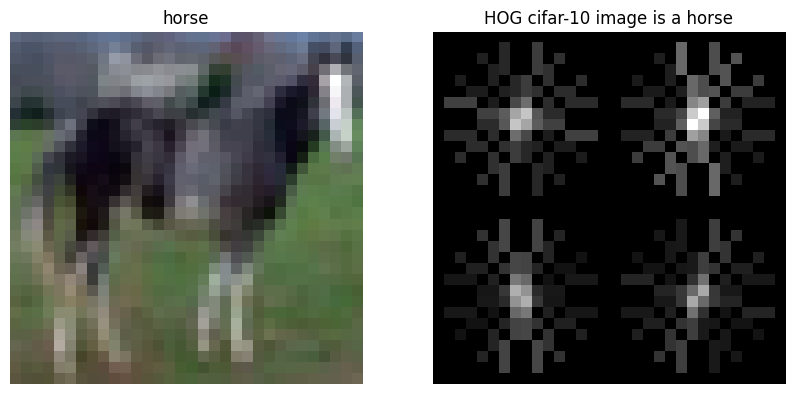

In [13]:
# Displaying the original CIFAR-10 image and the HOG (descriptor) image.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(img, cmap=plt.cm.gray)
ax1.set_title(classes[label])

ax2.axis('off')
ax2.imshow(hog_image2, cmap=plt.cm.gray)
ax2.set_title(f'HOG cifar-10 image is a {classes[label]}')
plt.show()

In [14]:
# # Normalizing the data.
X_train = X_train.astype('float64')
X_train /= 255

X_test = X_test.astype('float64')
X_test /= 255

In [15]:
# Converting X_train (images) to their HOG version.
X_train_hog = []
for i in range(len(X_train)):
    fd2, hog_image2 = hog(X_train[i],
                      orientations=9,
                      pixels_per_cell=(8, 8),
                      cells_per_block=(2, 2),
                      visualize=True,
                      channel_axis=-1)
    X_train_hog.append(fd2)

X_train_hog = np.array(X_train_hog)

## **<font color='red'>Support Vector Machine (SVM) method for classification**</font>

In [16]:
# Creating an object our model and fitting it.
svc_model = model = svm.SVC(degree=2, kernel='poly', random_state=42)
svc_model.fit(X_train_hog, y_train.ravel())

SVC(degree=2, kernel='poly', random_state=42)

In [17]:
# Measurement accuracy.
X_test_hog = []
for i in range(len(X_test)):
    fd2, hog_image2 = hog(X_test[i],
                     orientations=9,
                     pixels_per_cell = (8, 8),
                     cells_per_block = (2, 2),
                     visualize=True, channel_axis=-1)
    X_test_hog.append(fd2)

X_test_hog = np.array(X_test_hog)

# Making prediction.
y_pred = svc_model.predict(X_test_hog)

In [18]:
# Displaying metrics.
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall:', recall_score(y_test, y_pred, average='micro'))
print('F1 Score:', f1_score(y_test, y_pred, average='micro'))

Accuracy: 0.6401
Precision: 0.6401
Recall: 0.6401
F1 Score: 0.6401


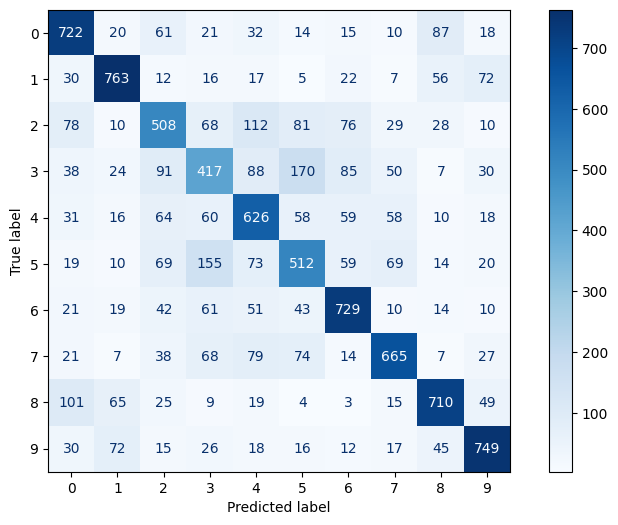

In [19]:
# Calculate the confusion matrix.
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=svc_model.classes_)
fig, ax = plt.subplots(figsize=(10, 6))
disp.plot(ax=ax, cmap=plt.cm.Blues)
plt.show()

# **<font color='blue'>Scale-Invariant Feature Transform (SIFT)**</font>

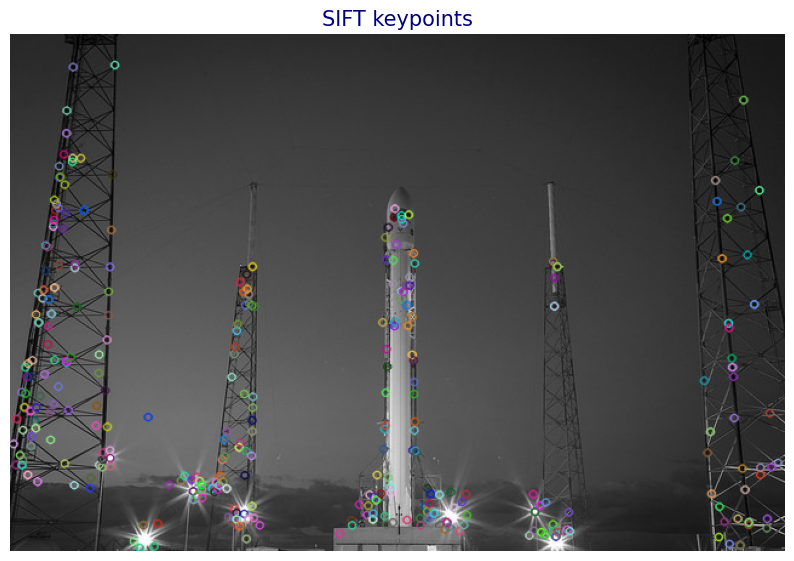

In [20]:
# Create SIFT object.
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors.
keypoints, descriptors = sift.detectAndCompute(gray_img, None)

# Draw the keypoints on the image.
img_with_keypoints = cv2.drawKeypoints(gray_img, keypoints, None)

# Creating a figure of a subplot.
fig = plt.figure(figsize=(10, 8))
plt.title('SIFT keypoints', fontsize=15, color='navy')
plt.axis('off')

# Display the image with keypoints.
plt.imshow(img_with_keypoints)
plt.show()

In [21]:
# Saving SIFT image.
cv2.imwrite('SIFT_keypoints.jpg', img_with_keypoints)
print('SIFT image has been successfully saved!')

SIFT image has been successfully saved!


# **<font color='blue'>SIFT vs HOG**</font>

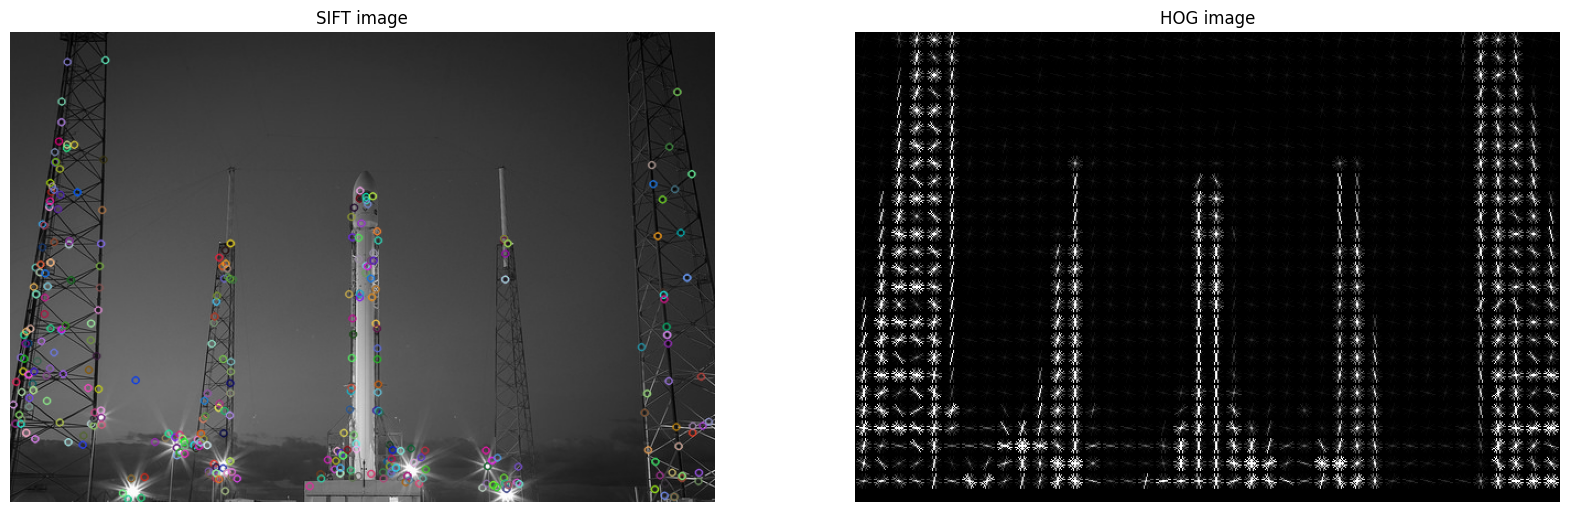

In [22]:
# Displaying the SIFT and the HOG images.

# Creating a figure of a subplot.
fig = plt.figure(figsize=(20, 16))

# Subplot and title of the SIFT filter.
ax1 = fig.add_subplot(221)  # top left side.
ax1.title.set_text('SIFT image')

# Subplot and title of the HOG filter.
ax2 = fig.add_subplot(222)  # top right side.
ax2.title.set_text('HOG image')

# Display the subplot.
ax1.imshow(img_with_keypoints)
ax2.imshow(hog_image_rescaled1, cmap='gray')
ax1.axis('off')
ax2.axis('off')
plt.show()